In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [14]:
data1 = pd.read_csv('../prices/prices_round_1_day_-2.csv', header = 0, sep=";")
data2 = pd.read_csv('../prices/prices_round_1_day_-1.csv', header = 0, sep=";")
data3 = pd.read_csv('../prices/prices_round_1_day_0.csv', header = 0, sep=";")

# Join rows of data1, data2 and data3
data = pd.concat([data1, data2, data3])
data = data.reset_index(drop=True) # Reset indices
data.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,AMETHYSTS,9996,1,9995.0,25.0,NaN,NaN,10004,1,10005.0,25.0,NaN,NaN,10000.0,0.0
1,-2,0,STARFRUIT,4997,26,NaN,NaN,NaN,NaN,5003,26,NaN,NaN,NaN,NaN,5000.0,0.0
2,-2,100,AMETHYSTS,10000,5,9995.0,20.0,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10002.5,0.0
3,-2,100,STARFRUIT,5000,5,4998.0,6.0,4997.0,20.0,5004,20,NaN,NaN,NaN,NaN,5002.0,0.0
4,-2,200,STARFRUIT,4997,1,4996.0,30.0,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,5000.0,0.0


Mean squared error: 0.8338645721840502. Coefficients: [-1.24036455 -0.05448628 -0.00141462  0.00851754 -0.00141462  0.04684707]. Intercept: -0.6367750044584239.


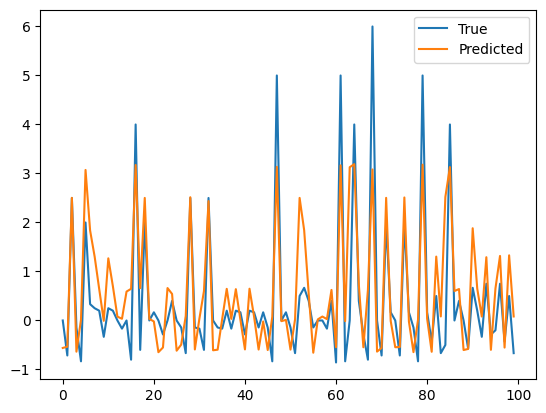

In [18]:
starfruit = data[data['product'] == 'STARFRUIT'].reset_index(drop=True).fillna(0)
mid_price = (starfruit['ask_price_1'] - starfruit['bid_price_1']) / 2

vwa_price = (starfruit['ask_price_1'] * starfruit['ask_volume_1'] + 
             starfruit['ask_price_2'] * starfruit['ask_volume_2'] + 
             starfruit['ask_price_3'] * starfruit['ask_volume_3'] + 
             starfruit['bid_price_1'] * starfruit['bid_volume_1'] + 
             starfruit['bid_price_2'] * starfruit['bid_volume_2'] + 
             starfruit['bid_price_3'] * starfruit['bid_volume_3']) / (starfruit['ask_volume_1'] + starfruit['bid_volume_1'] + 
                                                                      starfruit['ask_volume_2'] + starfruit['bid_volume_2'] +
                                                                      starfruit['ask_volume_3'] + starfruit['bid_volume_3'])

X = pd.DataFrame({'mid_price': mid_price, 'vwa_price': vwa_price}).iloc[:-1]
y = mid_price.pct_change().iloc[1:]

lr = LinearRegression()
lr.fit(X, y)

y_pred = lr.predict(X)
print(f"Mean squared error: {mean_squared_error(y, y_pred)}. Coefficients: {lr.coef_}. Intercept: {lr.intercept_}.")

plt.plot(np.array(y)[0:100], label='True')
plt.plot(np.array(y_pred)[0:100], label='Predicted')
plt.legend()
plt.show()

In [6]:
data1 = pd.read_csv('../prices/prices_round_3_day_0.csv', header = 0, sep=";")
data2 = pd.read_csv('../prices/prices_round_3_day_1.csv', header = 0, sep=";")
data3 = pd.read_csv('../prices/prices_round_3_day_2.csv', header = 0, sep=";")

# Join rows of data1, data2 and data3
data = pd.concat([data1, data2, data3])
data = data.reset_index(drop=True) # Reset indices
data.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,CHOCOLATE,7999,111,NaN,NaN,NaN,NaN,8001,111,NaN,NaN,NaN,NaN,8000.0,0.0
1,0,0,STRAWBERRIES,3999,210,NaN,NaN,NaN,NaN,4001,210,NaN,NaN,NaN,NaN,4000.0,0.0
2,0,0,ROSES,14999,72,NaN,NaN,NaN,NaN,15001,72,NaN,NaN,NaN,NaN,15000.0,0.0
3,0,0,GIFT_BASKET,71348,19,71347.0,24.0,NaN,NaN,71362,19,71363.0,24.0,NaN,NaN,71355.0,0.0
4,0,100,GIFT_BASKET,71344,1,71343.0,12.0,71342.0,20.0,71355,1,71356.0,12.0,71357.0,20.0,71349.5,0.0


Mean squared error: 0.16841210468795306. Coefficients: [-1.39313358e+00  6.26716368e-05]. Intercept: 0.5904868672510482.


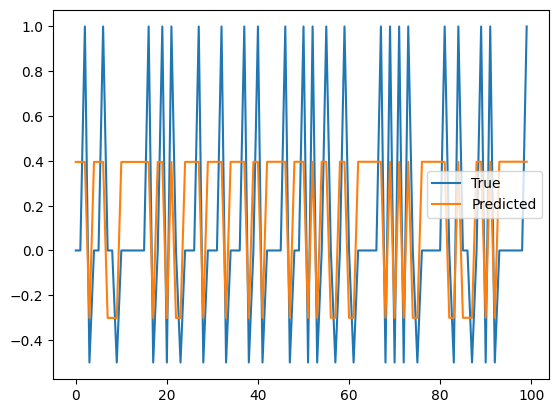

In [13]:
chocolate = data[data['product'] == 'CHOCOLATE'].reset_index(drop=True).fillna(0)
mid_price = (chocolate['ask_price_1'] - chocolate['bid_price_1']) / 2

vwa_price = (chocolate['ask_price_1'] * chocolate['ask_volume_1'] + 
             chocolate['ask_price_2'] * chocolate['ask_volume_2'] + 
             chocolate['ask_price_3'] * chocolate['ask_volume_3'] + 
             chocolate['bid_price_1'] * chocolate['bid_volume_1'] + 
             chocolate['bid_price_2'] * chocolate['bid_volume_2'] + 
             chocolate['bid_price_3'] * chocolate['bid_volume_3']) / (chocolate['ask_volume_1'] + chocolate['bid_volume_1'] + 
                                                                      chocolate['ask_volume_2'] + chocolate['bid_volume_2'] +
                                                                      chocolate['ask_volume_3'] + chocolate['bid_volume_3'])

X = pd.DataFrame({'mid_price': mid_price, 'vwa_price': vwa_price}).iloc[:-1]
y = mid_price.pct_change().iloc[1:]

lr = LinearRegression()
lr.fit(X, y)

y_pred = lr.predict(X)
print(f"Mean squared error: {mean_squared_error(y, y_pred)}. Coefficients: {lr.coef_}. Intercept: {lr.intercept_}.")

plt.plot(np.array(y)[100:200], label='True')
plt.plot(np.array(y_pred)[100:200], label='Predicted')
plt.legend()
plt.show()